# *Deep Learning with Keras* classification of Countries of the World data 

Prediction of the birth rate class of a given country (low, medium or high) based on a set of input features using **Deep Learning**.

- Data is provided for **224** countries
- Up to **18** input features available per country 

**Tasks**:
- Selecting a subset of suitable input features
- Preparing the data for Deep Learning with Keras
- Creating a training and testing sample 
- Running the deep learning process and evaluate predictive power  
- Investigating prediction accuracy changes with layers and nodes tuning
- Saved the trained models

In [1]:
# import required package
import pandas as pd
import numpy as np
from scipy import stats

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

import itertools

import dt_utils

%matplotlib inline 

Using TensorFlow backend.


#### 1. Data Extraction
- The features can be any of the following: 
  - Population, Area, Density, Coastline, Migration, InfantMortality, GDP, Literacy, Phones, Arable, Crops, OtherLand, Climate, Deathrate, Agriculture, Industry, Service
  - More information on the dataset is available [here](https://www.kaggle.com/fernandol/countries-of-the-world)
- Only 4 features are chosen as input into the Decision Tree. 

In [2]:
# Load country dataset 
bclass = ['low', 'medium', 'high'] # birth rate class (provided)
features_all = ['Population', 'Area', 'Density', 'Coastline', 'Migration', 'InfantMortality', 'GDP', 'Literacy', 'Phones', 'Arable', 'Crops', 'OtherLand', 'Climate', 'Deathrate', 'Agriculture', 'Industry', 'Service'] # fdefine features here 
path = 'countries.csv'
data_all = dt_utils.gendata(features_all, path)

In [3]:
# Choose only 4 features
feature_idx = [5, 6, 7, 11]

# Show feature names
features = []
for i in feature_idx:
    features.append(features_all[i])
features

['InfantMortality', 'GDP', 'Literacy', 'OtherLand']

In [4]:
data, target = data_all[:, feature_idx], data_all[:, [-1]].ravel()

#preprocess target data
le = preprocessing.LabelEncoder()
target_label = le.fit_transform(target)

# convert integers to dummy variables (i.e. one hot encoded)
target_label = np_utils.to_categorical(target_label)

# # Show dataset dimensions
data.shape, target.shape, np.unique(target)

((158, 4), (158,), array(['high', 'low', 'medium'], dtype=object))

#### 2. The feature distribution of the selected observations

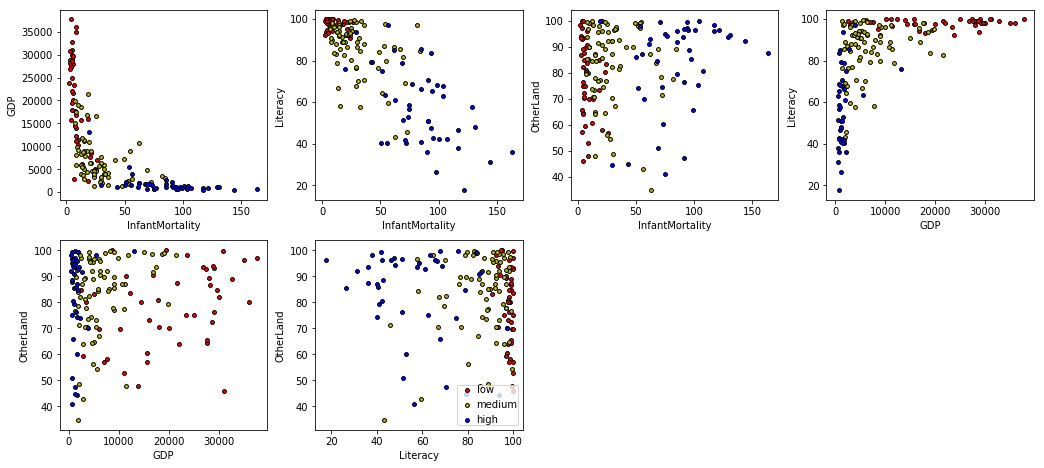

In [5]:
# generate 2D plots 
dt_utils.featuresplot(data, target, features, bclass)
plt.show()

#### 3. Constructing and training the Deep Learning based on your training data with the following requirements
- 70% of the observations are reserved for training

In [6]:
# split data into training and test dataset
d = model_selection.train_test_split(
    data, target_label, test_size=0.3, random_state=0)

# get training and test data and targets
train_data, test_data, train_target, test_target = d

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(110, 4) (110, 3) (48, 4) (48, 3)


#### 4. Constructing and training the Deep Learning based on your training data with the following requirements


In [7]:
# Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

C:\Users\azidh\Anaconda3\envs\keras\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
model = baseline_model()

#### 5. Creating Tensorboard logger to visualize and compare models performance
- To access the TensorBoard, run 'tensorboard --logdir=logs --host localhost' inside the file directory through terminal.


In [9]:
# RUN_NAME = 'run 1 epoch 500 nodes 8,3 softmax'

# # Create a TensorBoard logger
# logger = keras.callbacks.TensorBoard(
#     log_dir='logs/{}'.format(RUN_NAME),
#     histogram_freq=5,
#     write_graph=True
# )

In [10]:
# Train the model
model.fit(
    train_data,
    train_target,
    epochs=500,
    shuffle=True,
    verbose=2,
#     callbacks=[logger],
    validation_data=(test_data, test_target)
)

Train on 110 samples, validate on 48 samples
Epoch 1/500
 - 0s - loss: 0.2195 - acc: 0.4091 - val_loss: 0.2382 - val_acc: 0.3333
Epoch 2/500
 - 0s - loss: 0.2184 - acc: 0.4273 - val_loss: 0.2372 - val_acc: 0.3333
Epoch 3/500
 - 0s - loss: 0.2176 - acc: 0.4273 - val_loss: 0.2362 - val_acc: 0.3333
Epoch 4/500
 - 0s - loss: 0.2167 - acc: 0.4273 - val_loss: 0.2352 - val_acc: 0.3333
Epoch 5/500
 - 0s - loss: 0.2159 - acc: 0.4364 - val_loss: 0.2343 - val_acc: 0.3333
Epoch 6/500
 - 0s - loss: 0.2151 - acc: 0.4364 - val_loss: 0.2334 - val_acc: 0.3333
Epoch 7/500
 - 0s - loss: 0.2144 - acc: 0.4455 - val_loss: 0.2326 - val_acc: 0.3750
Epoch 8/500
 - 0s - loss: 0.2137 - acc: 0.4455 - val_loss: 0.2318 - val_acc: 0.3750
Epoch 9/500
 - 0s - loss: 0.2131 - acc: 0.4455 - val_loss: 0.2310 - val_acc: 0.3750
Epoch 10/500
 - 0s - loss: 0.2125 - acc: 0.4455 - val_loss: 0.2302 - val_acc: 0.3750
Epoch 11/500
 - 0s - loss: 0.2119 - acc: 0.4636 - val_loss: 0.2294 - val_acc: 0.3750
Epoch 12/500
 - 0s - loss: 0.

Epoch 97/500
 - 0s - loss: 0.1673 - acc: 0.6455 - val_loss: 0.1690 - val_acc: 0.6875
Epoch 98/500
 - 0s - loss: 0.1667 - acc: 0.6455 - val_loss: 0.1684 - val_acc: 0.6875
Epoch 99/500
 - 0s - loss: 0.1661 - acc: 0.6455 - val_loss: 0.1675 - val_acc: 0.7083
Epoch 100/500
 - 0s - loss: 0.1656 - acc: 0.6636 - val_loss: 0.1667 - val_acc: 0.7292
Epoch 101/500
 - 0s - loss: 0.1650 - acc: 0.6818 - val_loss: 0.1659 - val_acc: 0.7292
Epoch 102/500
 - 0s - loss: 0.1645 - acc: 0.6818 - val_loss: 0.1652 - val_acc: 0.7292
Epoch 103/500
 - 0s - loss: 0.1639 - acc: 0.6909 - val_loss: 0.1644 - val_acc: 0.7500
Epoch 104/500
 - 0s - loss: 0.1634 - acc: 0.7000 - val_loss: 0.1637 - val_acc: 0.7500
Epoch 105/500
 - 0s - loss: 0.1628 - acc: 0.7000 - val_loss: 0.1630 - val_acc: 0.7500
Epoch 106/500
 - 0s - loss: 0.1622 - acc: 0.7091 - val_loss: 0.1623 - val_acc: 0.7500
Epoch 107/500
 - 0s - loss: 0.1617 - acc: 0.7091 - val_loss: 0.1616 - val_acc: 0.7500
Epoch 108/500
 - 0s - loss: 0.1612 - acc: 0.7091 - val_lo

Epoch 193/500
 - 0s - loss: 0.1105 - acc: 0.8091 - val_loss: 0.1062 - val_acc: 0.7917
Epoch 194/500
 - 0s - loss: 0.1103 - acc: 0.8091 - val_loss: 0.1061 - val_acc: 0.7917
Epoch 195/500
 - 0s - loss: 0.1100 - acc: 0.8091 - val_loss: 0.1059 - val_acc: 0.7917
Epoch 196/500
 - 0s - loss: 0.1098 - acc: 0.8091 - val_loss: 0.1057 - val_acc: 0.7917
Epoch 197/500
 - 0s - loss: 0.1095 - acc: 0.8091 - val_loss: 0.1055 - val_acc: 0.7917
Epoch 198/500
 - 0s - loss: 0.1093 - acc: 0.8091 - val_loss: 0.1052 - val_acc: 0.7917
Epoch 199/500
 - 0s - loss: 0.1091 - acc: 0.8091 - val_loss: 0.1050 - val_acc: 0.7917
Epoch 200/500
 - 0s - loss: 0.1088 - acc: 0.8000 - val_loss: 0.1047 - val_acc: 0.7917
Epoch 201/500
 - 0s - loss: 0.1086 - acc: 0.8000 - val_loss: 0.1044 - val_acc: 0.7917
Epoch 202/500
 - 0s - loss: 0.1084 - acc: 0.8091 - val_loss: 0.1040 - val_acc: 0.7917
Epoch 203/500
 - 0s - loss: 0.1082 - acc: 0.8091 - val_loss: 0.1037 - val_acc: 0.7917
Epoch 204/500
 - 0s - loss: 0.1079 - acc: 0.8091 - val

Epoch 289/500
 - 0s - loss: 0.0963 - acc: 0.8182 - val_loss: 0.0909 - val_acc: 0.7917
Epoch 290/500
 - 0s - loss: 0.0963 - acc: 0.8182 - val_loss: 0.0908 - val_acc: 0.7917
Epoch 291/500
 - 0s - loss: 0.0963 - acc: 0.8091 - val_loss: 0.0908 - val_acc: 0.7917
Epoch 292/500
 - 0s - loss: 0.0961 - acc: 0.8091 - val_loss: 0.0906 - val_acc: 0.7917
Epoch 293/500
 - 0s - loss: 0.0960 - acc: 0.8091 - val_loss: 0.0905 - val_acc: 0.7917
Epoch 294/500
 - 0s - loss: 0.0960 - acc: 0.8182 - val_loss: 0.0904 - val_acc: 0.7917
Epoch 295/500
 - 0s - loss: 0.0959 - acc: 0.8182 - val_loss: 0.0904 - val_acc: 0.7917
Epoch 296/500
 - 0s - loss: 0.0958 - acc: 0.8182 - val_loss: 0.0903 - val_acc: 0.7917
Epoch 297/500
 - 0s - loss: 0.0957 - acc: 0.8182 - val_loss: 0.0903 - val_acc: 0.7917
Epoch 298/500
 - 0s - loss: 0.0956 - acc: 0.8182 - val_loss: 0.0903 - val_acc: 0.7917
Epoch 299/500
 - 0s - loss: 0.0955 - acc: 0.8182 - val_loss: 0.0902 - val_acc: 0.7917
Epoch 300/500
 - 0s - loss: 0.0954 - acc: 0.8182 - val

Epoch 385/500
 - 0s - loss: 0.0902 - acc: 0.8182 - val_loss: 0.0858 - val_acc: 0.7917
Epoch 386/500
 - 0s - loss: 0.0902 - acc: 0.8182 - val_loss: 0.0858 - val_acc: 0.7917
Epoch 387/500
 - 0s - loss: 0.0901 - acc: 0.8182 - val_loss: 0.0857 - val_acc: 0.7917
Epoch 388/500
 - 0s - loss: 0.0901 - acc: 0.8182 - val_loss: 0.0856 - val_acc: 0.7917
Epoch 389/500
 - 0s - loss: 0.0900 - acc: 0.8182 - val_loss: 0.0856 - val_acc: 0.7917
Epoch 390/500
 - 0s - loss: 0.0900 - acc: 0.8182 - val_loss: 0.0856 - val_acc: 0.7917
Epoch 391/500
 - 0s - loss: 0.0899 - acc: 0.8182 - val_loss: 0.0856 - val_acc: 0.7917
Epoch 392/500
 - 0s - loss: 0.0899 - acc: 0.8182 - val_loss: 0.0855 - val_acc: 0.7917
Epoch 393/500
 - 0s - loss: 0.0898 - acc: 0.8182 - val_loss: 0.0855 - val_acc: 0.7917
Epoch 394/500
 - 0s - loss: 0.0898 - acc: 0.8182 - val_loss: 0.0854 - val_acc: 0.7917
Epoch 395/500
 - 0s - loss: 0.0898 - acc: 0.8182 - val_loss: 0.0853 - val_acc: 0.7917
Epoch 396/500
 - 0s - loss: 0.0897 - acc: 0.8182 - val

Epoch 481/500
 - 0s - loss: 0.0864 - acc: 0.8182 - val_loss: 0.0830 - val_acc: 0.7917
Epoch 482/500
 - 0s - loss: 0.0863 - acc: 0.8182 - val_loss: 0.0830 - val_acc: 0.7917
Epoch 483/500
 - 0s - loss: 0.0863 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.7917
Epoch 484/500
 - 0s - loss: 0.0862 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.7917
Epoch 485/500
 - 0s - loss: 0.0862 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.7917
Epoch 486/500
 - 0s - loss: 0.0863 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.8125
Epoch 487/500
 - 0s - loss: 0.0861 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.8125
Epoch 488/500
 - 0s - loss: 0.0861 - acc: 0.8182 - val_loss: 0.0827 - val_acc: 0.7917
Epoch 489/500
 - 0s - loss: 0.0861 - acc: 0.8182 - val_loss: 0.0827 - val_acc: 0.7917
Epoch 490/500
 - 0s - loss: 0.0861 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.8125
Epoch 491/500
 - 0s - loss: 0.0860 - acc: 0.8182 - val_loss: 0.0828 - val_acc: 0.7917
Epoch 492/500
 - 0s - loss: 0.0860 - acc: 0.8182 - val

#### 6. Displaying the mean squared error for the predictions using the test sample

In [11]:
test_error_rate = model.evaluate(test_data, test_target, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate[0]))

The mean squared error (MSE) for the test data set is: [0.08244367688894272, 0.7916666666666666]


In [12]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=500, verbose=0)

kfold = model_selection.KFold(n_splits=10, shuffle=True)

results = model_selection.cross_val_score(estimator, data, target_label, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 41.71% (18.29%)


#### 7. Saving the trained model for future use.

In [13]:
# Save the model to disk
# model.save("{0:} - MSE{1:0.4f}.h5".format(RUN_NAME, test_error_rate))
# print('Model saved to disk.')

#### 8. Preparing and scaling the prediction data according to the training data.

In [14]:
path = 'new_countries.csv'
prediction_data_all = dt_utils.gendata(features_all, path)
prediction_data, expected_label = prediction_data_all[:, feature_idx], pd.Series(prediction_data_all[:, [-1]].ravel(), name='Expected')
prediction_data = scaler.transform(prediction_data)

# scaled_prediction_df = pd.DataFrame(prediction_data, columns=features)
# expected_df =  pd.DataFrame(expected, columns=['Expected Target'])

# scaled_prediction_df.to_csv("scaled_new_countries.csv", index=False)
# expected_df.to_csv("expected_new_countries.csv", index=False)

#### 9. Make the prediction using new countries feature data.

In [15]:
prediction = model.predict_classes(prediction_data)
prediction_label = pd.Series(le.inverse_transform(prediction), name='Predicted')

C:\Users\azidh\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### 10. Compare the prediction of result with its expectation.

In [16]:
compare = pd.concat([prediction_label, expected_label], axis=1)
compare